In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
df_heart = pd.read_csv('heart.csv')
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [28]:
df_features = df_heart.drop('target', axis = 1)
df_target = df_heart['target']

Escalamos nuestros Features debido a que tienen distintinta escalabilidad cada uno

In [29]:
df_features_sc = StandardScaler().fit_transform(df_features)

Dividimos nuestros datos en test de entrenamiento y prueba

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_features_sc, df_target, test_size = 0.3, random_state = 42)

Compararemos PCA con incremental PCA

* incremental PCA se utiliza cuando tenemos un computador con bajos recursos ya que no envia todos los datos a entrenar al mismo tiempo si no que crea pequeños bloques llamados "batch". Donde va entrenandolos poco a poco y convinandolos en el resultado final.

In [31]:
pca = PCA(n_components = 3) # probaremos con 3
pca.fit(X_train)

ipca = IncrementalPCA(n_components = 3, batch_size = 10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

Una vez ajustados nuestrosa datos vamos a medir la varianza que los modelos alcanzan a extaer despues de ejecutarse.

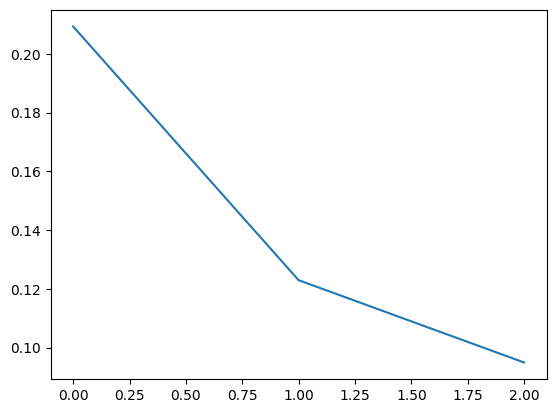

In [32]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)

* en el eje X se puede observar las componentes, 1 en 0, otra en 1 y otra en 2.
* Del eje y se obtiene la importancia. La primera componente nos aporta mas del 20% de la información, la segunda componente mas del 12% de la información, etc.

Transformaremos nuestros datos ya ajustados de Entrenamiento y Test con PCA 

In [33]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [34]:
X_train_ipca = ipca.transform(X_train)
X_test_ipca = ipca.transform(X_test)

Ahora lo que hay que hacer es la regresión Logistica y compararla con los dos algoritmos.

In [35]:
Logistic = LogisticRegression(solver = 'lbfgs') # el solver lo utilizamos para evitar algunas advertencias que nos puede enviar a futuro.

In [42]:
Lg_pca = Logistic.fit(X_train_pca, y_train)
print("Score PCA", Lg_pca.score(X_test_pca, y_test))

lg_ipca = Logistic.fit(X_train_ipca, y_train)
print("Score IPCA", lg_ipca.score(X_test_ipca, y_test))

Score PCA 0.7857142857142857
Score IPCA 0.8051948051948052


* nos damos cuenta que el acuracy es casi el mismo.
* el dataset tenia 13 features para predecir una clasificación binaria(Tiene o no una enfermedad cardiaca).
* utilizando PCA nos quedamos con 3 features artificiales para llegar a un resultado bueno, por lo que nos ahorramos coste computacional y nos quedamos con lo realmente importante para nuestro modelo.

# Alternativa a PCA 

### Kernels

* Función matematica que toma mediciones que se comportan de forma no lineal y las proyecta en un espacio no dimensional mas grande donde sean linealmente separables.

In [43]:
from sklearn.decomposition import KernelPCA

In [44]:
df_heart = pd.read_csv('heart.csv')
df_features = df_heart.drop('target', axis = 1)
df_target = df_heart['target']

df_features_sc = StandardScaler().fit_transform(df_features)

X_train, X_test, y_train, y_test = train_test_split(df_features_sc, df_target, test_size = 0.3, random_state = 42)

In [47]:
kernel_pca = KernelPCA(n_components = 4, kernel = 'poly') # n_componentes es opcional pero utilizamos 4 a medida de ejemplo. adfemas, utilizamos un kernel polinomial
kernel_pca.fit(X_train)

X_train_kernel_pca = kernel_pca.transform(X_train)
X_test_kernel_pca =  kernel_pca.transform(X_test)

log_kernel_pca = LogisticRegression(solver = 'lbfgs')
log_kernel_pca.fit(X_train_kernel_pca, y_train)

print("Score Kernel PCA", log_kernel_pca.score(X_test_kernel_pca, y_test))



Score Kernel PCA 0.7987012987012987


* Podemos observar que el accuracy es casi del 80%, lo que es bueno.
* el trabajo es identificar cuando utilizar un Kernel o un PCA simple.
